<a href="https://colab.research.google.com/github/Ujjwal-Modi/AI-Assisted-Hiring/blob/main/8_sem_Ai_hiring_assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation (Skill vs AI): 0.930
Correlation (Skill vs Human): 0.891


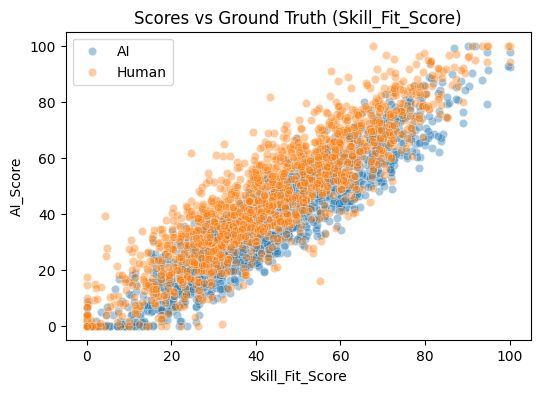

          AI_Error  Human_Error
count  1500.000000  1500.000000
mean     -5.644447     2.126553
std       7.753802    10.070934
min     -26.090000   -39.380000
25%     -11.600000    -4.697500
50%      -5.460000     1.870000
75%       0.082500     9.112500
max      17.520000    38.190000


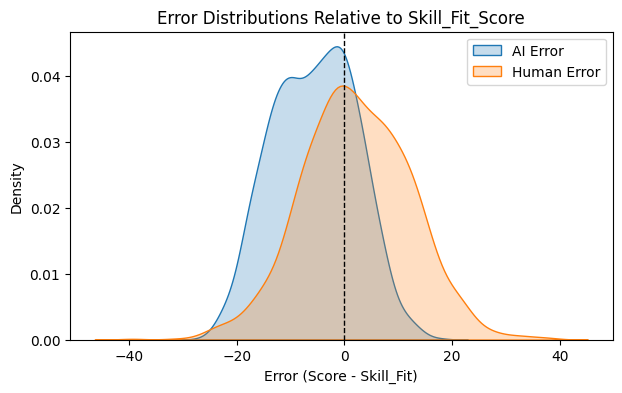

AI MAE: 7.73, AI RMSE: 9.59
Human MAE: 8.17, Human RMSE: 10.29


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ai_hiring_audit_dataset.csv")

# Pearson correlations
ai_corr = df["Skill_Fit_Score"].corr(df["AI_Score"])
human_corr = df["Skill_Fit_Score"].corr(df["Human_Score"])

print(f"Correlation (Skill vs AI): {ai_corr:.3f}")
print(f"Correlation (Skill vs Human): {human_corr:.3f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x="Skill_Fit_Score", y="AI_Score", data=df, alpha=0.4, label="AI")
sns.scatterplot(x="Skill_Fit_Score", y="Human_Score", data=df, alpha=0.4, label="Human")
plt.title("Scores vs Ground Truth (Skill_Fit_Score)")
plt.legend()
plt.show()

df["AI_Error"] = df["AI_Score"] - df["Skill_Fit_Score"]
df["Human_Error"] = df["Human_Score"] - df["Skill_Fit_Score"]

# Basic statistics
error_summary = df[["AI_Error", "Human_Error"]].describe()
print(error_summary)

plt.figure(figsize=(7,4))
sns.kdeplot(df["AI_Error"], label="AI Error", fill=True)
sns.kdeplot(df["Human_Error"], label="Human Error", fill=True)
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.title("Error Distributions Relative to Skill_Fit_Score")
plt.xlabel("Error (Score - Skill_Fit)")
plt.legend()
plt.show()

# Mean Absolute Error (MAE)
ai_mae = np.mean(np.abs(df["AI_Error"]))
human_mae = np.mean(np.abs(df["Human_Error"]))

# Root Mean Squared Error (RMSE)
ai_rmse = np.sqrt(np.mean(df["AI_Error"] ** 2))
human_rmse = np.sqrt(np.mean(df["Human_Error"] ** 2))

print(f"AI MAE: {ai_mae:.2f}, AI RMSE: {ai_rmse:.2f}")
print(f"Human MAE: {human_mae:.2f}, Human RMSE: {human_rmse:.2f}")


                     mean       std  count
Education_Level                           
PhD             -6.139387  7.695331    163
Bachelors       -5.880414  7.794366    677
Masters         -5.593713  7.775346    501
Associate       -4.292201  7.489491    159


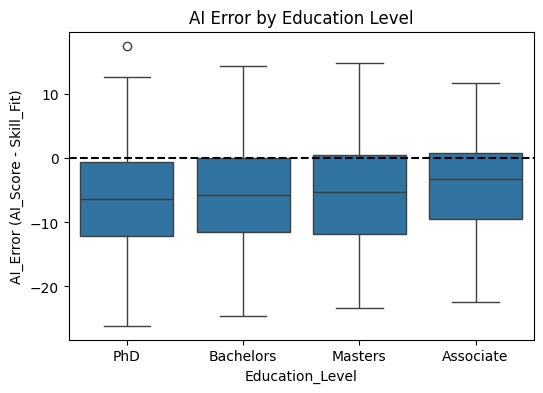

                       mean       std  count
Job_Category                                
Marketing Manager -6.262034  7.433368    413
Software Engineer -5.618796  7.967046    357
HR Specialist     -5.317488  7.810893    402
Data Analyst      -5.295457  7.831289    328


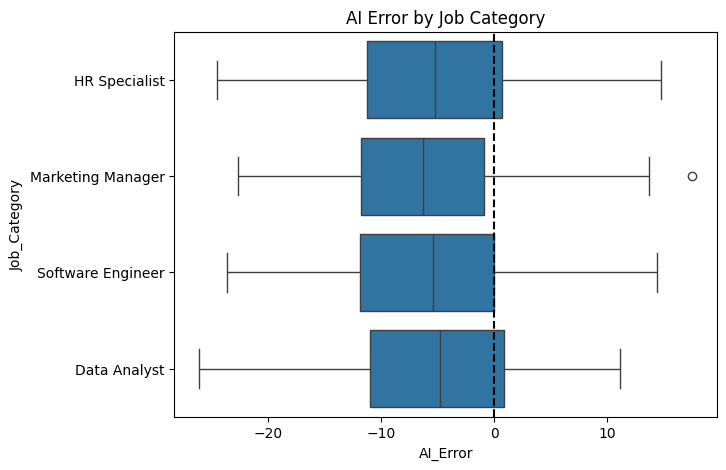

                    mean       std  count
Experience_Bin                           
0–2            -4.911295  6.799443    139
3–5            -5.347931  7.222264    232
6–10           -5.663286  8.064152    350
11–20          -6.088836  8.028738    696
20+                  NaN       NaN      0


/tmp/ipython-input-2359151001.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Experience_Bin")["AI_Error"]


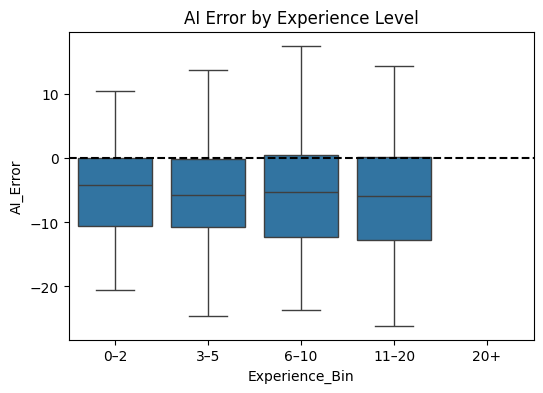

/tmp/ipython-input-2359151001.py:61: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


Skill_Bin              Low        Mid       High  Very High
Education_Level                                            
Associate        17.022929  43.301628  63.382500        NaN
Bachelors        20.129571  42.658832  60.185556  82.624286
Masters          24.086335  44.841204  62.943206  76.367778
PhD              25.520000  44.253273  62.118667  83.865652


/tmp/ipython-input-2359151001.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


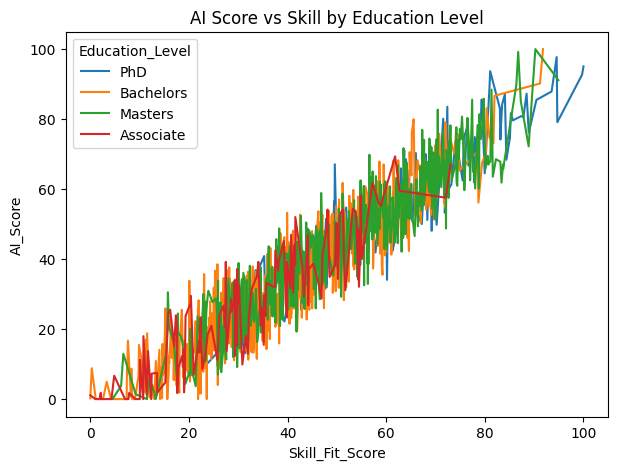

In [3]:
# Mean AI error by education level
edu_bias = (
    df.groupby("Education_Level")["AI_Error"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

print(edu_bias)

plt.figure(figsize=(6,4))
sns.boxplot(x="Education_Level", y="AI_Error", data=df)
plt.axhline(0, color="black", linestyle="--")
plt.title("AI Error by Education Level")
plt.ylabel("AI_Error (AI_Score - Skill_Fit)")
plt.show()

job_bias = (
    df.groupby("Job_Category")["AI_Error"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

print(job_bias)

plt.figure(figsize=(7,5))
sns.boxplot(y="Job_Category", x="AI_Error", data=df)
plt.axvline(0, color="black", linestyle="--")
plt.title("AI Error by Job Category")
plt.xlabel("AI_Error")
plt.show()


# Create experience bins
df["Experience_Bin"] = pd.cut(
    df["Years_Experience"],
    bins=[0, 2, 5, 10, 20, 40],
    labels=["0–2", "3–5", "6–10", "11–20", "20+"]
)

exp_bias = (
    df.groupby("Experience_Bin")["AI_Error"]
    .agg(["mean", "std", "count"])
)

print(exp_bias)

plt.figure(figsize=(6,4))
sns.boxplot(x="Experience_Bin", y="AI_Error", data=df)
plt.axhline(0, color="black", linestyle="--")
plt.title("AI Error by Experience Level")
plt.ylabel("AI_Error")
plt.show()

df["Skill_Bin"] = pd.cut(
    df["Skill_Fit_Score"],
    bins=[0, 40, 60, 80, 100],
    labels=["Low", "Mid", "High", "Very High"]
)

pivot_edu_skill = (
    df.pivot_table(
        values="AI_Score",
        index="Education_Level",
        columns="Skill_Bin",
        aggfunc="mean"
    )
)

print(pivot_edu_skill)

plt.figure(figsize=(7,5))
sns.lineplot(
    data=df,
    x="Skill_Fit_Score",
    y="AI_Score",
    hue="Education_Level",
    estimator="mean",
    ci=None
)
plt.title("AI Score vs Skill by Education Level")
plt.show()



                 AI_Selection_Rate  Human_Selection_Rate  Final_Selection_Rate
Education_Level                                                               
Associate                 0.012579              0.037736              0.044025
Bachelors                 0.063516              0.097489              0.116691
Masters                   0.145709              0.199601              0.231537
PhD                       0.312883              0.355828              0.417178
                 AI_Selection_Rate  Human_Selection_Rate  Final_Selection_Rate
Education_Level                                                               
Associate                 0.040202              0.106051              0.105531
Bachelors                 0.203001              0.273977              0.279716
Masters                   0.465696              0.560947              0.555008
PhD                       1.000000              1.000000              1.000000


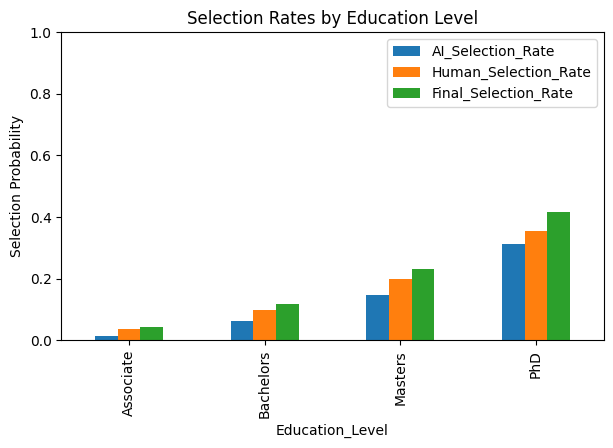

                   AI_Selection_Rate  Human_Selection_Rate  \
Job_Category                                                 
Data Analyst                0.118902              0.134146   
HR Specialist               0.141791              0.181592   
Marketing Manager           0.070218              0.150121   
Software Engineer           0.123249              0.142857   

                   Final_Selection_Rate  
Job_Category                             
Data Analyst                   0.164634  
HR Specialist                  0.216418  
Marketing Manager              0.164649  
Software Engineer              0.170868  
                   AI_Selection_Rate  Human_Selection_Rate  \
Job_Category                                                 
Data Analyst                0.838575              0.738724   
HR Specialist               1.000000              1.000000   
Marketing Manager           0.495221              0.826694   
Software Engineer           0.869232              0.786693   

  

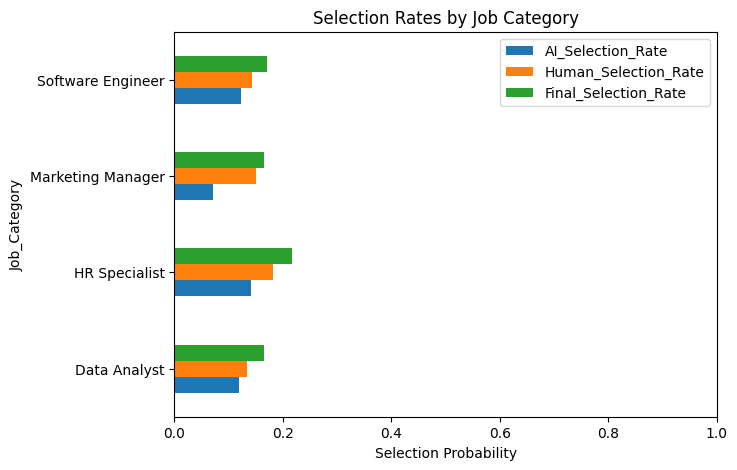

                 AI_to_Human_Gap  Human_to_Final_Gap
Education_Level                                     
Associate               0.025157            0.006289
Bachelors               0.033973            0.019202
Masters                 0.053892            0.031936
PhD                     0.042945            0.061350


In [4]:
# Selection rates by education level
edu_selection = (
    df.groupby("Education_Level")[["AI_Decision", "Human_Decision", "Final_Decision"]]
    .mean()
    .rename(columns={
        "AI_Decision": "AI_Selection_Rate",
        "Human_Decision": "Human_Selection_Rate",
        "Final_Decision": "Final_Selection_Rate"
    })
)

print(edu_selection)
edu_ratio = edu_selection.div(edu_selection.max())

print(edu_ratio)
edu_selection.plot(
    kind="bar",
    figsize=(7,4),
    title="Selection Rates by Education Level"
)
plt.ylabel("Selection Probability")
plt.ylim(0, 1)
plt.show()
job_selection = (
    df.groupby("Job_Category")[["AI_Decision", "Human_Decision", "Final_Decision"]]
    .mean()
    .rename(columns={
        "AI_Decision": "AI_Selection_Rate",
        "Human_Decision": "Human_Selection_Rate",
        "Final_Decision": "Final_Selection_Rate"
    })
)

print(job_selection)
job_ratio = job_selection.div(job_selection.max())
print(job_ratio)
job_selection.plot(
    kind="barh",
    figsize=(7,5),
    title="Selection Rates by Job Category"
)
plt.xlabel("Selection Probability")
plt.xlim(0, 1)
plt.show()
edu_mitigation = pd.DataFrame({
    "AI_to_Human_Gap": edu_selection["Human_Selection_Rate"] - edu_selection["AI_Selection_Rate"],
    "Human_to_Final_Gap": edu_selection["Final_Selection_Rate"] - edu_selection["Human_Selection_Rate"]
})

print(edu_mitigation)


                 Disagreement_Rate
Education_Level                   
Associate                 0.037736
Bachelors                 0.072378
Masters                   0.117764
PhD                       0.165644


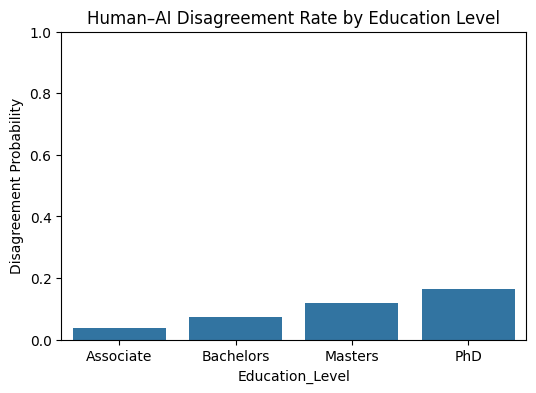

                   Disagreement_Rate
Job_Category                        
Data Analyst                0.076220
HR Specialist               0.109453
Marketing Manager           0.108959
Software Engineer           0.075630


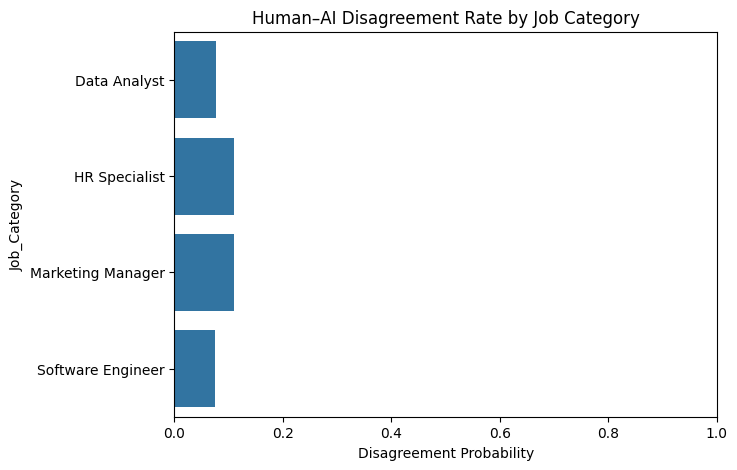

                     mean        std  count
Education_Level                            
Bachelors       -8.264742  12.102254    677
Associate       -8.001321  11.560401    159
Masters         -7.312735  12.252990    501
PhD             -6.904172  11.939229    163


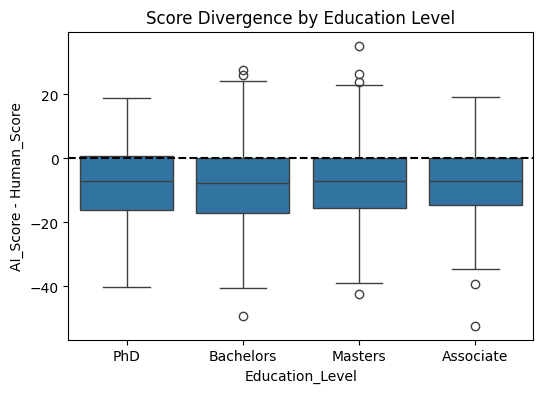

                       mean        std  count
Job_Category                                 
Software Engineer -8.259692  12.182225    357
Marketing Manager -8.024697  11.746008    413
HR Specialist     -7.477637  12.724058    402
Data Analyst      -7.279207  11.581752    328


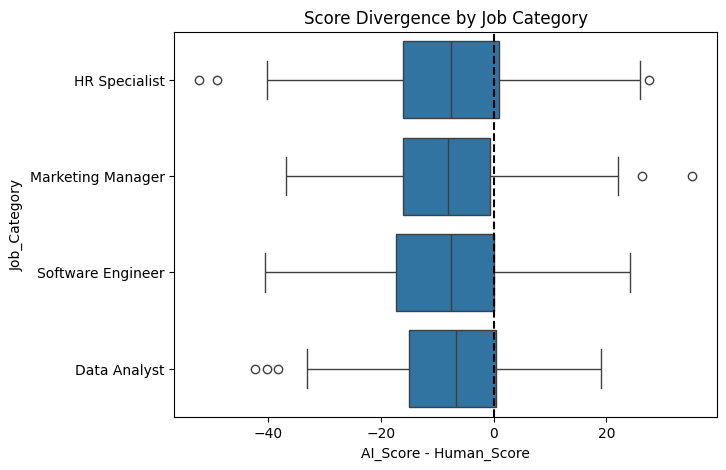

                 Avg_Human_Override
Education_Level                    
Associate                  0.666667
Bachelors                  0.469388
Masters                    0.457627
PhD                        0.259259
                   Avg_Human_Override
Job_Category                         
Data Analyst                 0.200000
HR Specialist                0.363636
Marketing Manager            0.733333
Software Engineer            0.259259


/tmp/ipython-input-769261291.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Human_Decision"] - x["AI_Decision"]).mean())
/tmp/ipython-input-769261291.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Human_Decision"] - x["AI_Decision"]).mean())


In [5]:
edu_disagreement = (
    df.groupby("Education_Level")["Decision_Agreement"]
    .apply(lambda x: 1 - x.mean())
    .to_frame(name="Disagreement_Rate")
)

print(edu_disagreement)
plt.figure(figsize=(6,4))
sns.barplot(
    x=edu_disagreement.index,
    y=edu_disagreement["Disagreement_Rate"]
)
plt.title("Human–AI Disagreement Rate by Education Level")
plt.ylabel("Disagreement Probability")
plt.ylim(0, 1)
plt.show()
job_disagreement = (
    df.groupby("Job_Category")["Decision_Agreement"]
    .apply(lambda x: 1 - x.mean())
    .to_frame(name="Disagreement_Rate")
)

print(job_disagreement)
plt.figure(figsize=(7,5))
sns.barplot(
    y=job_disagreement.index,
    x=job_disagreement["Disagreement_Rate"]
)
plt.title("Human–AI Disagreement Rate by Job Category")
plt.xlabel("Disagreement Probability")
plt.xlim(0, 1)
plt.show()
edu_divergence = (
    df.groupby("Education_Level")["Score_Divergence"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

print(edu_divergence)
plt.figure(figsize=(6,4))
sns.boxplot(
    x="Education_Level",
    y="Score_Divergence",
    data=df
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Score Divergence by Education Level")
plt.ylabel("AI_Score - Human_Score")
plt.show()
job_divergence = (
    df.groupby("Job_Category")["Score_Divergence"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

print(job_divergence)
plt.figure(figsize=(7,5))
sns.boxplot(
    y="Job_Category",
    x="Score_Divergence",
    data=df
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Score Divergence by Job Category")
plt.xlabel("AI_Score - Human_Score")
plt.show()
# Cases where AI and Human decisions differ
overrides = df[df["Decision_Agreement"] == 0]

override_summary = (
    overrides.groupby("Education_Level")
    .apply(lambda x: (x["Human_Decision"] - x["AI_Decision"]).mean())
    .to_frame(name="Avg_Human_Override")
)

print(override_summary)
job_override = (
    overrides.groupby("Job_Category")
    .apply(lambda x: (x["Human_Decision"] - x["AI_Decision"]).mean())
    .to_frame(name="Avg_Human_Override")
)

print(job_override)


Education Level Disparity:
             AI     Human     Final
Range  0.300305  0.318092  0.373153
Std    0.131462  0.139202  0.162693


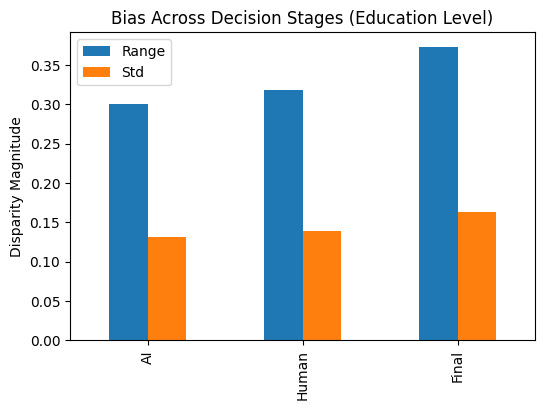

Job Category Disparity:
             AI     Human     Final
Range  0.071573  0.047446  0.051784
Std    0.030539  0.020667  0.025023


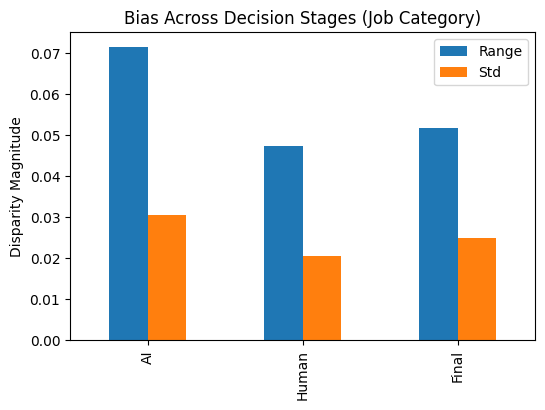

Education mitigation: {'AI_to_Human_Reduction': -0.017787552571671084, 'Human_to_Final_Change': -0.055060385075433094, 'Net_AI_to_Final_Reduction': -0.07284793764710418}
Job category mitigation: {'AI_to_Human_Reduction': 0.024127428762994216, 'Human_to_Final_Change': -0.00433806576871737, 'Net_AI_to_Final_Reduction': 0.019789362994276846}


In [6]:
def selection_disparity(df, group_col, decision_col):
    rates = df.groupby(group_col)[decision_col].mean()
    return {
        "min_rate": rates.min(),
        "max_rate": rates.max(),
        "range": rates.max() - rates.min(),
        "std": rates.std(),
        "rates": rates
    }
edu_ai = selection_disparity(df, "Education_Level", "AI_Decision")
edu_human = selection_disparity(df, "Education_Level", "Human_Decision")
edu_final = selection_disparity(df, "Education_Level", "Final_Decision")

edu_summary = pd.DataFrame({
    "AI": [edu_ai["range"], edu_ai["std"]],
    "Human": [edu_human["range"], edu_human["std"]],
    "Final": [edu_final["range"], edu_final["std"]]
}, index=["Range", "Std"])

print("Education Level Disparity:")
print(edu_summary)
edu_summary.T.plot(
    kind="bar",
    figsize=(6,4),
    title="Bias Across Decision Stages (Education Level)"
)
plt.ylabel("Disparity Magnitude")
plt.show()
job_ai = selection_disparity(df, "Job_Category", "AI_Decision")
job_human = selection_disparity(df, "Job_Category", "Human_Decision")
job_final = selection_disparity(df, "Job_Category", "Final_Decision")

job_summary = pd.DataFrame({
    "AI": [job_ai["range"], job_ai["std"]],
    "Human": [job_human["range"], job_human["std"]],
    "Final": [job_final["range"], job_final["std"]]
}, index=["Range", "Std"])

print("Job Category Disparity:")
print(job_summary)
job_summary.T.plot(
    kind="bar",
    figsize=(6,4),
    title="Bias Across Decision Stages (Job Category)"
)
plt.ylabel("Disparity Magnitude")
plt.show()
mitigation_edu = {
    "AI_to_Human_Reduction": edu_ai["range"] - edu_human["range"],
    "Human_to_Final_Change": edu_human["range"] - edu_final["range"],
    "Net_AI_to_Final_Reduction": edu_ai["range"] - edu_final["range"]
}

mitigation_job = {
    "AI_to_Human_Reduction": job_ai["range"] - job_human["range"],
    "Human_to_Final_Change": job_human["range"] - job_final["range"],
    "Net_AI_to_Final_Reduction": job_ai["range"] - job_final["range"]
}

print("Education mitigation:", mitigation_edu)
print("Job category mitigation:", mitigation_job)


Counterfactual sample size: 72
                      mean       std  count
Education_Level                            
Bachelors        62.959630  7.647084     27
Masters          65.670645  7.472038     31
PhD              63.322143  9.998968     14


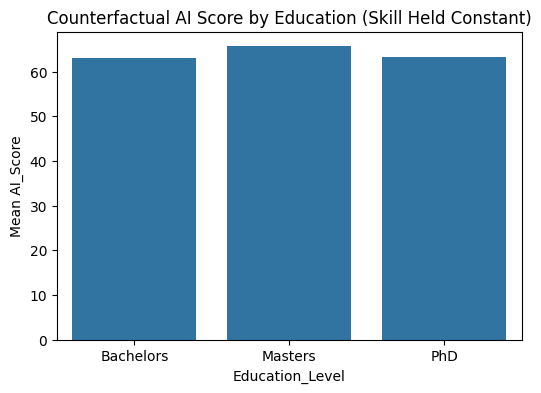

                 Selection_Rate
Education_Level                
Bachelors              0.370370
Masters                0.548387
PhD                    0.571429
                        mean       std  count
Job_Category                                 
Marketing Manager  62.110000  6.038650     21
Data Analyst       62.504167  9.319791     12
HR Specialist      65.662632  9.656456     19
Software Engineer  66.013000  7.322096     20


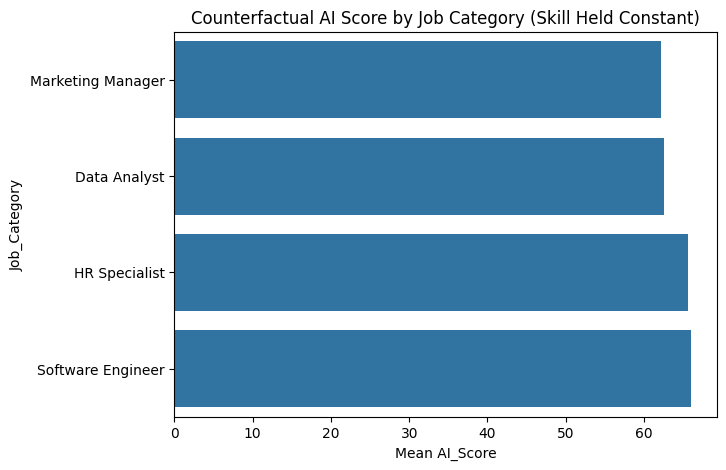

                   Selection_Rate
Job_Category                     
Data Analyst             0.416667
HR Specialist            0.684211
Marketing Manager        0.285714
Software Engineer        0.550000
Education counterfactual score gap: 2.71
Job category counterfactual score gap: 3.90


In [7]:
# Narrow skill band (you can adjust width)
skill_center = 70
skill_band = 2

cf_df = df[
    (df["Skill_Fit_Score"] >= skill_center - skill_band) &
    (df["Skill_Fit_Score"] <= skill_center + skill_band)
].copy()

print("Counterfactual sample size:", len(cf_df))
edu_cf_scores = (
    cf_df.groupby("Education_Level")["AI_Score"]
    .agg(["mean", "std", "count"])
)

print(edu_cf_scores)
plt.figure(figsize=(6,4))
sns.barplot(
    x=edu_cf_scores.index,
    y=edu_cf_scores["mean"]
)
plt.title("Counterfactual AI Score by Education (Skill Held Constant)")
plt.ylabel("Mean AI_Score")
plt.show()
edu_cf_decision = (
    cf_df.groupby("Education_Level")["AI_Decision"]
    .mean()
    .to_frame(name="Selection_Rate")
)

print(edu_cf_decision)
job_cf_scores = (
    cf_df.groupby("Job_Category")["AI_Score"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)

print(job_cf_scores)
plt.figure(figsize=(7,5))
sns.barplot(
    y=job_cf_scores.index,
    x=job_cf_scores["mean"]
)
plt.title("Counterfactual AI Score by Job Category (Skill Held Constant)")
plt.xlabel("Mean AI_Score")
plt.show()
job_cf_decision = (
    cf_df.groupby("Job_Category")["AI_Decision"]
    .mean()
    .to_frame(name="Selection_Rate")
)

print(job_cf_decision)
def counterfactual_gap(df, group_col):
    return (
        df.groupby(group_col)["AI_Score"]
        .mean()
        .max()
        -
        df.groupby(group_col)["AI_Score"]
        .mean()
        .min()
    )

edu_gap = counterfactual_gap(cf_df, "Education_Level")
job_gap = counterfactual_gap(cf_df, "Job_Category")

print(f"Education counterfactual score gap: {edu_gap:.2f}")
print(f"Job category counterfactual score gap: {job_gap:.2f}")


                 Model  Accuracy   ROC_AUC  Skill_Correlation
0  Logistic_Regression  0.913333  0.961625           0.672128
2        Random_Forest  0.902222  0.957610           0.679087
3    Gradient_Boosting  0.893333  0.954314           0.655427
4                  SVM  0.915556  0.953595           0.674311
1        Decision_Tree  0.900000  0.921359           0.677269
                 Model  Edu_Disparity  Job_Disparity
0  Logistic_Regression       0.392329       0.024075
1        Decision_Tree       0.429294       0.027536
2        Random_Forest       0.416869       0.031878
3    Gradient_Boosting       0.398156       0.035620
4                  SVM       0.380059       0.021653
                 Model  Accuracy   ROC_AUC  Skill_Correlation  Edu_Disparity  \
0  Logistic_Regression  0.913333  0.961625           0.672128       0.392329   
1        Random_Forest  0.902222  0.957610           0.679087       0.416869   
2    Gradient_Boosting  0.893333  0.954314           0.655427       0.

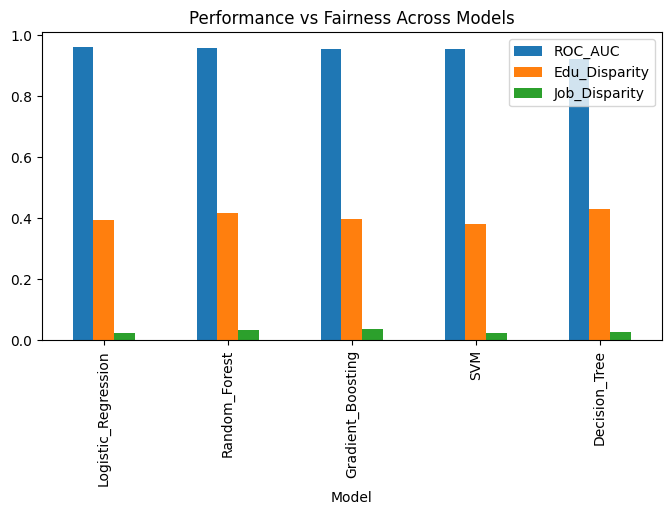

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Features (intentionally minimal)
X = df[["Skill_Fit_Score", "Years_Experience"]]
y = df["Final_Decision"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
models = {
    "Logistic_Regression": LogisticRegression(solver="liblinear"),
    "Decision_Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random_Forest": RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42),
    "Gradient_Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    df[f"{name}_Decision"] = model.predict(X)
    df[f"{name}_Prob"] = model.predict_proba(X)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob),
        "Skill_Correlation": df["Skill_Fit_Score"].corr(df[f"{name}_Decision"])
    })
performance_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
print(performance_df)
def disparity(df, group_col, decision_col):
    rates = df.groupby(group_col)[decision_col].mean()
    return rates.max() - rates.min()
fairness_results = []

for name in models.keys():
    fairness_results.append({
        "Model": name,
        "Edu_Disparity": disparity(df, "Education_Level", f"{name}_Decision"),
        "Job_Disparity": disparity(df, "Job_Category", f"{name}_Decision")
    })

fairness_df = pd.DataFrame(fairness_results)
print(fairness_df)
comparison = performance_df.merge(fairness_df, on="Model")
print(comparison)
comparison.set_index("Model")[["ROC_AUC", "Edu_Disparity", "Job_Disparity"]].plot(
    kind="bar",
    figsize=(8,4),
    title="Performance vs Fairness Across Models"
)
plt.show()
